<a href="https://colab.research.google.com/github/Khan-solo/Support_Vector_Regression/blob/main/Support_Vector_Regressoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#Importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Machine learning/Support Vector Regression/Position_Salaries.csv")
np.set_printoptions(precision= 2)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [34]:
#Getting Matrix of features and dependent variable
X = np.array(dataset.iloc[:, 1:-1])
y = np.array(dataset.iloc[:, -1])
y=y.reshape(len(y), 1)


In [35]:
#Feature scaling: (hella important, otherwise SVR wont work)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scy = StandardScaler()
X = sc.fit_transform(X)
y = scy.fit_transform(y)

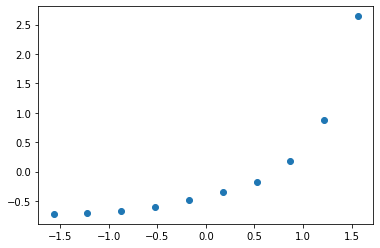

In [36]:
#visualising the scaled data. 
plt.scatter(X, y)
plt.show()

In [37]:
#training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting a new result

* "Position level" has to be a 2D array
* Since we trained on X and y, both were scaled using 2 different scalars
* The observations have to be of the same scale
* Hence, apply scaling to the value

In [38]:
#predicting the salary at level 6.5
scy.inverse_transform(regressor.predict(sc.transform([[6.5]])))

array([170370.02])

* Transforming the value of the variable (X) to the scale used for scaling the training set
* Inverse transforming the prediction to the original value, from the scaled down values of dependent variable 

Visualising the data

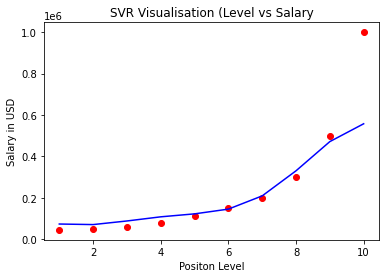

In [42]:
#using matplotlib
#inverse transforming the matrix of features and dependent variable
plt.scatter(sc.inverse_transform(X), scy.inverse_transform(y), color= "red")
plt.plot(sc.inverse_transform(X), scy.inverse_transform(regressor.predict(X)), color = "blue")
plt.title("SVR Visualisation (Level vs Salary")
plt.xlabel("Positon Level")
plt.ylabel("Salary in USD")
plt.show()

Visualising in higer resolution

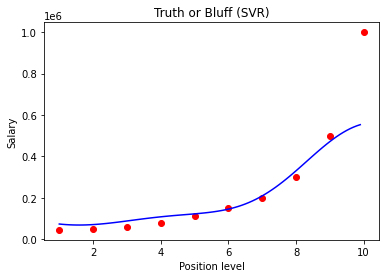

In [43]:
X_grid = np.arange(min(sc.inverse_transform(X)), max(sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc.inverse_transform(X), scy.inverse_transform(y), color = 'red')
plt.plot(X_grid, scy.inverse_transform(regressor.predict(sc.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()